# ASSIGNMENT options

- Replicate the lesson code. [Do it "the hard way" or with the "Benjamin Franklin method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit)
- Apply the lesson to other datasets you've worked with before, and compare results.
- Choose how to split the Bank Marketing dataset. Train and validate baseline models.
- Get weather data for your own area and calculate both baselines.  _"One (persistence) predicts that the weather tomorrow is going to be whatever it was today. The other (climatology) predicts whatever the average historical weather has been on this day from prior years."_ What is the mean absolute error for each baseline? What if you average the two together? 
- When would this notebook's pipelines fail? How could you fix them? Add more [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) and [imputation](https://scikit-learn.org/stable/modules/impute.html) to your [pipelines](https://scikit-learn.org/stable/modules/compose.html) with scikit-learn.
- [This example from scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html) demonstrates its improved `OneHotEncoder` and new `ColumnTransformer` objects, which can replace functionality from third-party libraries like category_encoders and sklearn-pandas. Adapt this example, which uses Titanic data, to work with another dataset.






In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#accuracy_score(y_test, y_pred)

In [18]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']


 Eigenvectors : 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

 Eigenvalues  : 
 [4.22484077 0.24224357]


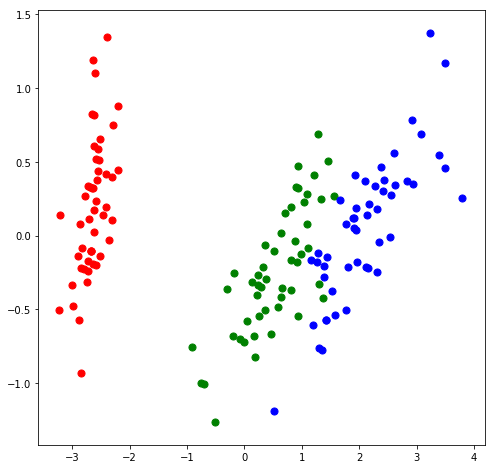

In [19]:
pca = PCA(2)
pca.fit(X)
print("\n Eigenvectors : \n", pca.components_)
print("\n Eigenvalues  : \n", pca.explained_variance_)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r','g','b']


    

B = pca.transform(X)
dfB= pd.DataFrame(B)
df_plot = pd.concat([dfB,df[['species']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)


for target, color in zip(targets, colors):
    indicesToKeep = df_plot['species'] == target
    ax.scatter(df_plot.loc[indicesToKeep, 0]
              , df_plot.loc[indicesToKeep, 1]
              , c = color
              , s = 50)

# Train, Validation, Test

In [97]:
def train_validation_test_split( X, y, train_size=0.7, val_size = 0.15, test_size =0.15, \
                                random_state=None, shuffle=True):
    assert train_size +val_size+test_size ==1 
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,y, test_size=test_size, random_state = random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val,y_train_val, test_size = val_size/(train_size+val_size),\
        random_state=random_state, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [98]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X,Y)

In [99]:
y_train.shape

(104,)

In [100]:
pipeline = make_pipeline(StandardScaler(),
                         PCA(4),
                       LogisticRegression()
                       )

In [101]:
pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.8260869565217391

In [102]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

0.8260869565217391

In [103]:
y_test.shape

(23,)